<a href="https://colab.research.google.com/github/govindvarma1/Machine-Learning/blob/main/KNN_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.datasets import make_blobs

X_Train, Y_Train = make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std=6, random_state=10)

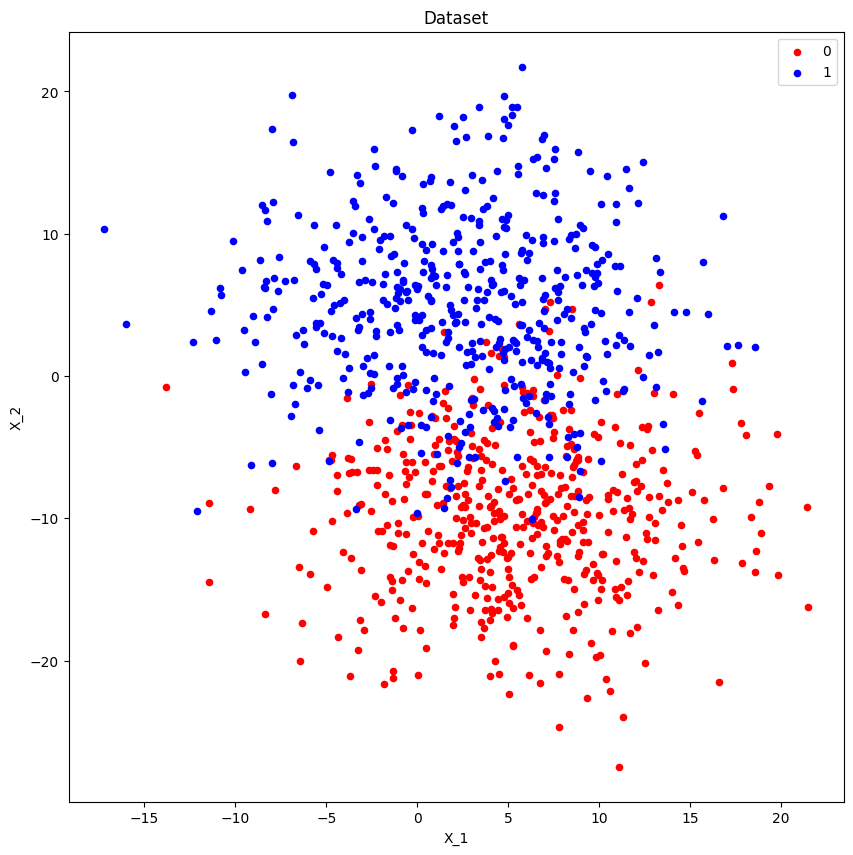

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import DataFrame

df = DataFrame(dict(x=X_Train[:,0], y=X_Train[:,1], label=Y_Train))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots(figsize = (10, 10))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Dataset')
plt.show()

In [ ]:
def normalize(X):
  x1_min = min(X_Train[:,0])
  x1_max = max(X_Train[:,0])

  f = lambda x: (x - x1_min) / (x1_max - x1_min)
  X[:,0] = f(X[:, 0])

  x2_min = min(X_Train[:,1])
  x2_max = max(X_Train[:,1])

  f = lambda x: (x - x2_min) / (x2_max - x2_min)
  X[:,1] = f(X[:, 1])

  return X

In [ ]:
X = normalize(X_Train)
print(X_Train[0:5])

[[0.64343503 0.56027165]
 [0.52724665 0.24541077]
 [0.53486914 0.44438038]
 [0.56855403 0.67988257]
 [0.60413095 0.73422215]]


In [ ]:
def find_neighbors(k, X_tr, new_point):
  neighbour_arr = []
  for i in range(len(X_tr)):
    # dist = np.sqrt(sum(np.square(X_tr - new_point)))
    dist = np.linalg.norm(X_tr[i] - new_point)
    neighbour_arr.append([i, dist])
  neighbour_arr = sorted(neighbour_arr, key=lambda x: x[1])
  return neighbour_arr[:k]


In [ ]:
from collections import Counter
def classifier(neighbour_arr):
  class_arr = [Y_Train[i[0]] for i in neighbour_arr]
  return Counter(class_arr).most_common(1)[0][0]

In [ ]:
new_points = np.array([[-10, -10],
                       [0, 10],
                       [-15, 10],
                       [5, -2]])

new_points = normalize(new_points)

In [ ]:
knn = find_neighbors(4, X, new_points[1])
classifier(knn)

1

**Regression Model**

In [ ]:
from sklearn.datasets import make_regression
X_Train, Y_Train = make_regression(n_samples=1000, n_features=2, n_informative=2, noise=5, bias=30, random_state=200)


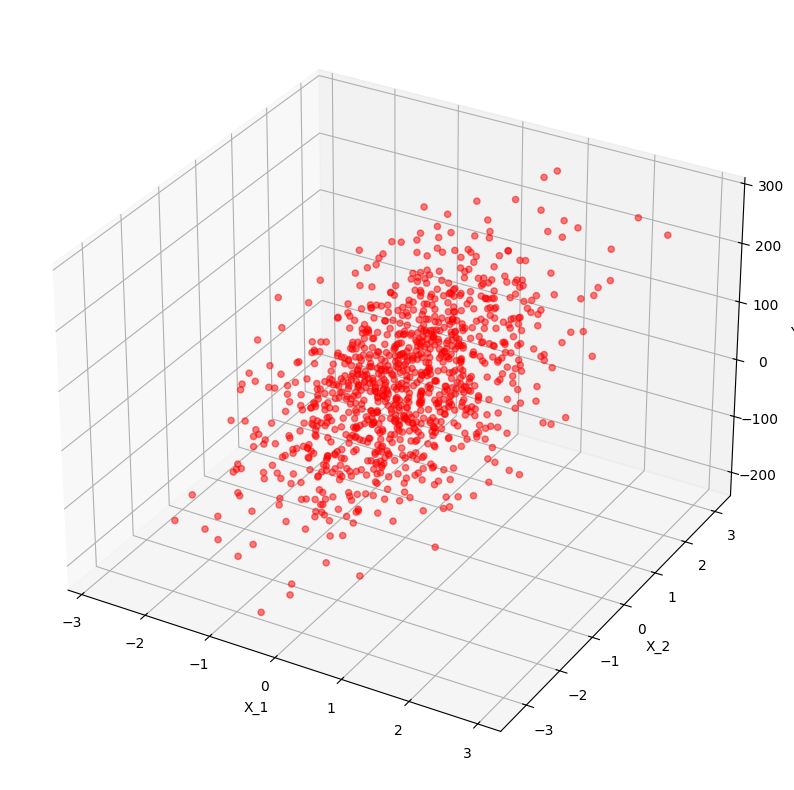

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_Train[:,0], X_Train[:,1], Y_Train, c='red', alpha=0.5, marker='o')
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('Y')
plt.show()

In [ ]:
def regressor(neighbour_arr):
  y_arr = [Y_Train[i[0]] for i in neighbour_arr]
  avg_y = np.mean(y_arr);
  return avg_y

In [ ]:
new_points = np.array([[-1, 1],
                       [0, 2],
                       [-3, -2],
                       [3, -3]])

knn = find_neighbors(3, X_Train, new_points[1])
regressor(knn)

157.98331740281003